In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
suicide_df = pd.read_csv("suicide_data.csv")
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
print ("Number of rows:", suicide_df.shape[0],"Number of columns:", suicide_df.shape[1])

Number of rows: 27820 Number of columns: 12


In [4]:
suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
suicide_df.info

<bound method DataFrame.info of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0             

In [6]:
#DROPPING HDI SINCE THERE ARE A LOT OF NULL VALUES AND COUNTRY-YEAR IS ALREADY AVAILABLE AS 2 COLUMNS
suicide_df.drop(columns = ['HDI for year', 'country-year'], inplace = True)

In [7]:
#Removing the 'years' from the 'age' column
suicide_df['age'] = suicide_df.age.str.replace('years', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
suicide_df['age'] = suicide_df['age'].apply(lambda x: x.strip())   

#Remove commas and convert GDP to float 
suicide_df[' gdp_for_year ($) '] = suicide_df[' gdp_for_year ($) '].str.replace(',', '').astype(float)
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,2.156625e+09,796,Boomers


In [8]:
suicide_df['age'].value_counts()

55-74    4642
15-24    4642
75+      4642
35-54    4642
25-34    4642
5-14     4610
Name: age, dtype: int64

In [9]:
suicide_df.groupby(['country'])[['suicides_no']].sum().reset_index()

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101
...,...,...
96,United Arab Emirates,622
97,United Kingdom,136805
98,United States,1034013
99,Uruguay,13138


In [10]:
suicide_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [11]:
'''
Converting to category data type in order to reaarange
'''

suicide_df['age'] = pd.Categorical(suicide_df['age'])
suicide_df['age'].cat.reorder_categories(['5-14','15-24','25-34',
                                          '35-54','55-74','75+'], inplace = True)
suicide_df['generation'] = pd.Categorical(suicide_df['generation'])
suicide_df['generation'].cat.reorder_categories(['G.I. Generation','Silent','Boomers','Generation X','Millenials','Generation Z'],
                                          inplace = True)



###### SUICIDE RATE TREND THROUGH THE YEARS

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

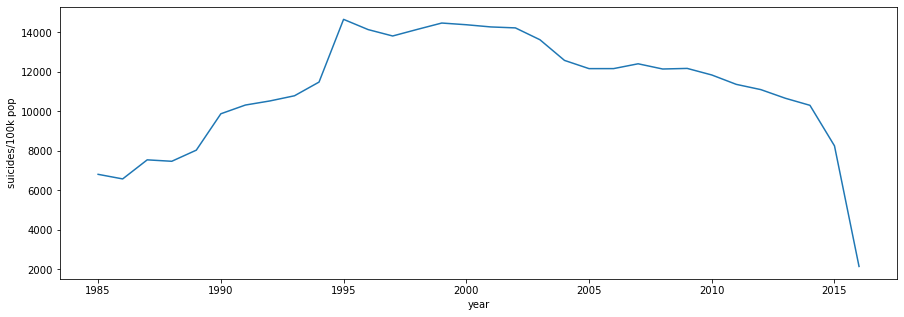

In [12]:
rate_through_years = suicide_df.groupby(['year'])['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot (x = 'year', y = 'suicides/100k pop' ,data = rate_through_years)

###### SUICIDE RATE TREND BASED ON GENDER

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

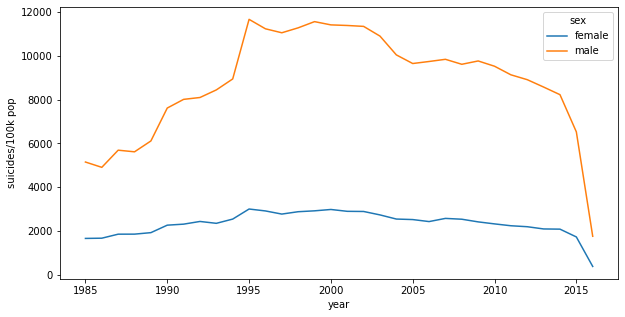

In [13]:
by_year = suicide_df.groupby (['year','sex'])['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot (x = 'year', y = 'suicides/100k pop', hue = 'sex' ,data = by_year)

###### SUICIDE RATE TREND BASED ON AGE

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

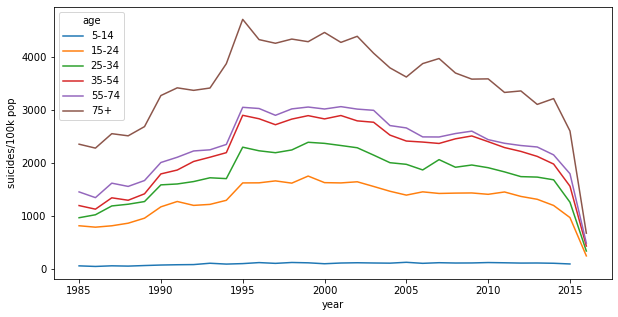

In [14]:
by_age = suicide_df.groupby (['year', 'age'])['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot (x = 'year', y = 'suicides/100k pop', hue = 'age' ,data = by_age)

###### SUICIDE RATE TREND BASED ON GENERATION

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

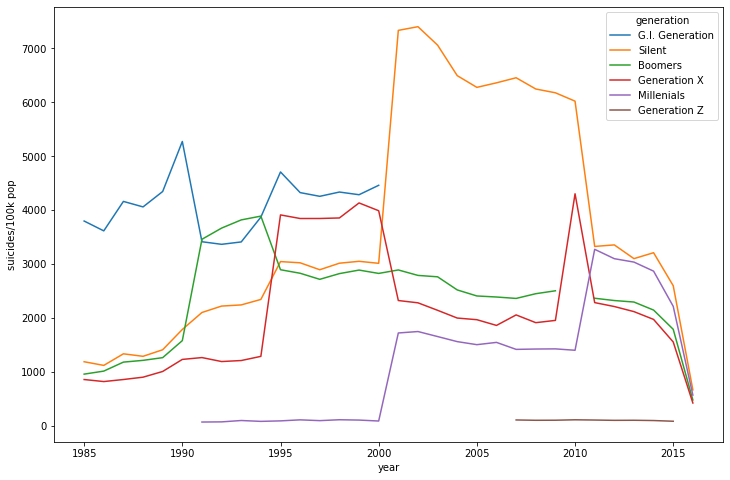

In [15]:
by_gen = suicide_df.groupby (['year', 'generation'])['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot (x = 'year', y = 'suicides/100k pop', hue = 'generation' ,data = by_gen)

###### SUICIDE RATE TREND BASED ON AGE AND GENDER

<Figure size 864x576 with 0 Axes>

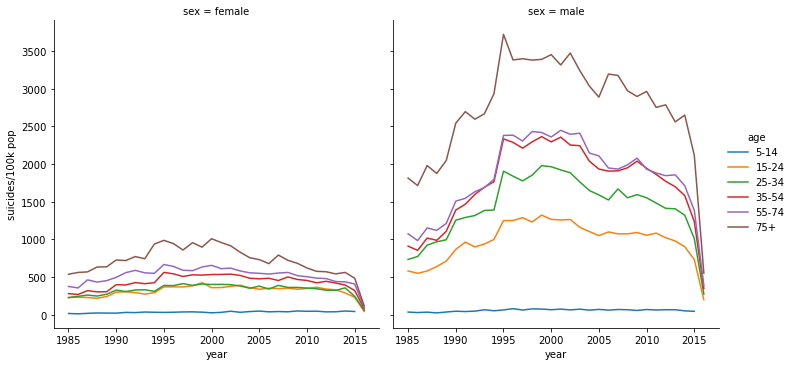

In [16]:
by_gender_age = suicide_df.groupby (['year', 'age', 'sex'])['suicides/100k pop'].sum().reset_index()
plt.figure(figsize=(12,8))
sns.relplot (x = 'year', y = 'suicides/100k pop', hue = 'age', col = 'sex' ,data = by_gender_age, kind='line')

In [17]:
suicide_df[['gdp_per_capita ($)','suicides/100k pop']].corr()

,gdp_per_capita ($),suicides/100k pop
gdp_per_capita ($),1.000000,0.001785
suicides/100k pop,0.001785,1.000000


In [18]:
suicide_df['country'].value_counts()

Austria                   382
Iceland                   382
Mauritius                 382
Netherlands               382
Israel                    372
                         ... 
Bosnia and Herzegovina     24
Macau                      12
Cabo Verde                 12
Dominica                   12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [19]:
#Cabo Verde, Macau, Dominica and Mongolia have less than 15 values, remove from dataset
#suicide_df = suicide_df.drop

###### Finding Outliers

<AxesSubplot:xlabel='suicides/100k pop'>

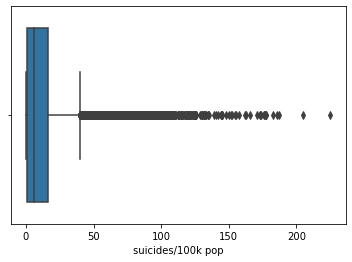

In [20]:
sns.boxplot( x = suicide_df['suicides/100k pop'])

In [21]:
#Finding inter-quartile range
IRQ = suicide_df['suicides/100k pop'].quantile(0.75) - suicide_df['suicides/100k pop'].quantile(0.25) 
IRQ

15.700000000000001

In [22]:
#UPPER BOUND = 1.5*Q3 OR Q3 + 1.5*IRQ
#LOWER BOUND = 1.5*Q1 OR Q1 - 1.5*IRQ

Q3 = suicide_df['suicides/100k pop'].quantile(0.75)
Q1 = suicide_df['suicides/100k pop'].quantile(0.25)
print (Q3, Q1)
print ("Upper:", Q3 + 1.5*IRQ )
print ("Lower:", Q1 - 1.5*IRQ )

16.62 0.92
Upper: 40.17
Lower: -22.63


In [23]:
#OUTLIERS: ANYTHING THAT DOES NOT FALL IN BETWEEN UPPER AND LOWER BOUNDS

print ('Outlier below lower bound:', suicide_df['suicides/100k pop'].lt(Q1 - 1.5*IRQ ).sum())
print ('Outlier above upper bound:', suicide_df['suicides/100k pop'].gt(Q3 + 1.5*IRQ ).sum())

Outlier below lower bound: 0
Outlier above upper bound: 2046


In [24]:
suicide_df.shape

(27820, 10)

In [25]:
df_new = suicide_df[suicide_df['suicides/100k pop'].le(Q3 + 1.5*IRQ)]
df_new.shape

(25774, 10)

In [26]:
df_new.corr()['suicides/100k pop']

year                 -0.033178
suicides_no           0.311633
population            0.050826
suicides/100k pop     1.000000
 gdp_for_year ($)     0.081791
gdp_per_capita ($)    0.104914
Name: suicides/100k pop, dtype: float64

In [27]:
df_new.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,2.156625e+09,796,Boomers


In [28]:
X = df_new.drop (['suicides_no', 'suicides/100k pop'], axis = 1)
y = df_new['suicides/100k pop']

<AxesSubplot:>

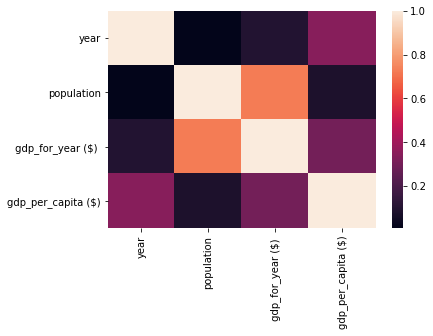

In [29]:
sns.heatmap (X.corr())

In [30]:
numeric = ['year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'population']

categorical = ['country', 'sex', 'age', 'generation']

In [31]:
"""
Putting the above in a pipeline for pre-processing 
(filling in missing values, scaling and normalizing)
"""

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [32]:
num_transform = Pipeline (steps = [ 
    ('imputer', SimpleImputer(missing_values = np.nan , strategy = 'mean')),
    ('scaler', StandardScaler())])
cat_transform = Pipeline (steps = [
    ('onehoten', OneHotEncoder())])
preprocess = ColumnTransformer ( transformers = [ 
        ('num', num_transform, numeric), ('cat', cat_transform, categorical)
])

clf = Pipeline ( steps = [('preprocess', preprocess)])
X = clf.fit_transform(X)

In [33]:
X

<25774x119 sparse matrix of type '<class 'numpy.float64'>'
	with 206192 stored elements in Compressed Sparse Row format>

###### SPLITTING INTO TRAIN AND TEST DATASETS

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=10)

##### TRYING VARIOUS ML ALGORITHMS

In [85]:
scores= {}

###### MODEL : 1 LINEAR REGRESSION

In [105]:
#MODELLING
from sklearn.linear_model import LinearRegression
model1 = LinearRegression (fit_intercept = False)
model1.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [106]:
#PREDICTING
y_pred_test = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

In [109]:
#EVALUATING
from sklearn.metrics import r2_score, mean_squared_error
acc_train1 = r2_score (y_train, y_pred_train)
acc_test1 = r2_score (y_test, y_pred_test)
RMS_train1 = np.sqrt (mean_squared_error (y_train, y_pred_train))
RMS_test1 = np.sqrt (mean_squared_error (y_test, y_pred_test))
print ("R2 Score of Training Set:", acc_train1)
print ("R2 Score of Testing Set:", acc_test1)
print ("RMS of Training Set:", RMS_train1)
print ("RMS of Testing Set:", RMS_test1)
#print ("Coefficient:", model1.coef_)

R2 Score of Training Set: 0.5700716315546401
R2 Score of Testing Set: 0.5585435479920573
RMS of Training Set: 6.290397580551828
RMS of Testing Set: 6.43935433321648


In [130]:
#UPDATING SCORES DICT
scores ['R2-SCORE LR:'] = acc_test1
scores ['RMS- LR:'] = RMS_test1

###### MODEL : 2 SUPPORT VECTOR REGRESSION

In [111]:
#MODELLING
from sklearn.svm import SVR
model2 = SVR (kernel = 'rbf')
model2.fit (X_train, y_train)

SVR()

In [112]:
#PREDICTING
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [113]:
#EVALUATING
acc_train2 = r2_score (y_train, y_pred_train)
acc_test2 = r2_score (y_test, y_pred_test)
RMS_train2 = np.sqrt (mean_squared_error (y_train, y_pred_train))
RMS_test2 = np.sqrt (mean_squared_error (y_test, y_pred_test))
print ("Accuracy of Training Set:", acc_train2)
print ("Accuracy of Testing Set:", acc_test2)
print ("RMS of Training Set:", RMS_train2)
print ("RMS of Testing Set:", RMS_test2)

Accuracy of Training Set: 0.6510861013754234
Accuracy of Testing Set: 0.6337527790392266
RMS of Training Set: 5.666816882118808
RMS of Testing Set: 5.865236898251643


In [131]:
#UPDATING SCORES DICT
scores ['R2-SCORE SVR:'] = acc_test2
scores ['RMS- SVR:'] = RMS_test2

###### DECISION TREE REGRESSION

In [133]:
#MODELLING
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit (X_train, y_train)

DecisionTreeRegressor()

In [134]:
#PREDICTING
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)

In [135]:
#EVALUATING
acc_train3 = r2_score (y_train, y_pred_train)
acc_test3 = r2_score (y_test, y_pred_test)
RMS_train3 = np.sqrt (mean_squared_error (y_train, y_pred_train))
RMS_test3 = np.sqrt (mean_squared_error (y_test, y_pred_test))
print ("Accuracy of Training Set:", acc_train3)
print ("Accuracy of Testing Set:", acc_test3)
print ("RMS of Training Set:", RMS_train3)
print ("RMS of Testing Set:", RMS_test3)

Accuracy of Training Set: 1.0
Accuracy of Testing Set: 0.7668766828285098
RMS of Training Set: 8.200733365950016e-19
RMS of Testing Set: 4.67941158727289


In [136]:
#UPDATING SCORES DICT
scores ['R2-SCORE DTR:'] = acc_test3
scores ['RMS- DTR:'] = RMS_test3

###### RANDOM FOREST REGRESSION

In [137]:
'''
fits a number of classifying decision trees on various sub-samples 
of the dataset and uses averaging to improve the predictive accuracy 
and control over-fitting
'''
#MODELLING
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor (n_estimators = 30) #number of trees in the forest
model4.fit (X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [138]:
#PREDICTING
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

In [139]:
#EVALUATING
acc_train4 = r2_score (y_train, y_pred_train)
acc_test4 = r2_score (y_test, y_pred_test)
RMS_train4 = np.sqrt (mean_squared_error (y_train, y_pred_train))
RMS_test4 = np.sqrt (mean_squared_error (y_test, y_pred_test))
print ("Accuracy of Training Set:", acc_train4)
print ("Accuracy of Testing Set:", acc_test4)
print ("RMS of Training Set:", RMS_train4)
print ("RMS of Testing Set:", RMS_test4)

Accuracy of Training Set: 0.9797722801405344
Accuracy of Testing Set: 0.8564462312482874
RMS of Training Set: 1.3644370679700695
RMS of Testing Set: 3.6720254992850343


In [140]:
#UPDATING SCORES DICT
scores ['R2-SCORE RFR:'] = acc_test4
scores ['RMS- RFR:'] = RMS_test4

In [141]:
scores

{'R2-SCORE LR:': 0.5585435479920573,
 'RMS- LR:': 6.43935433321648,
 'R2-SCORE SVR:': 0.6337527790392266,
 'RMS- SVR:': 5.865236898251643,
 'R2-SCORE DTR:': 0.7668766828285098,
 'RMS- DTR:': 4.67941158727289,
 'R2-SCORE RFR:': 0.8564462312482874,
 'RMS- RFR:': 3.6720254992850343}

##### RANDOM FOREST REGRESSOR HAS A HIGH R2-SCORE AS WELL AS A LOW ROOT MEAN SQUARE ERROR VALUE 
##### AND HENCE SEEMS LIKE THE BEST MODEL FOR OUR PURPOSE